<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

Откроем файл с данными и изучим общую информацию.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# открываем файл с данными и рабиваем столбцы по отдельным колонкам параметром sep
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# выводим первые пять строк наших данных
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# смотрим общую информацию наших данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, в таблице 22 столбца и 23699 строк. Тип данных для столбцов с числовым значением — `int64` и `float64`, а со строчным — `object`. 

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

При выгрузке файла данные склеились в одну строку. Для разделения использовали соответсвующий параметр в аргуементе функции `read_csv`.

Исходя из информации о датафрейме, в данных есть пропущенные значения.

Также, необходимо поменять тип данных некоторых столбцов на соответсвующие.


### Вывод

Каждая строка таблицы описыает - данные о продаваемой квартире. Часть колонок описывает параметры квартиры: количество сделанных фотографий, цену продажи, общую и жилую площадь, число команат, высота потолков, количество этажей и на каком этаже квартира, квартира это студия, апартаменты или свободная планировка, площадь кухни, число балконов, название населенного пункта. Остальные данные рассказывают об удаленности от аэропорта, центра города, парков и водоемов, а также о дате публикации и его количества размещенного дня. 

Предварительно можно утверждать, что, данных достаточно для исследования. Но встречаются пропуски в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Определим и изучим пропущенные данные, и приведем данные к нужному типу.

In [5]:
# считаем процент пропущенных значений столбца населенного пункта
df.locality_name.isna().sum()/df.shape[0]*100

0.20675977889362418

In [6]:
# удаляем строчки с пропущенными значениями населенного пункта
df.dropna(subset=['locality_name'], inplace=True)

Поскольку нет параметров по которым можно было бы точно определить название населнного пункта и как процент пропущенных значений от общего количества строк составляет 0,21%, то можно исключить строчки с пропущенными значениями столбца `locality_name`

In [7]:
# убираем слова из названий населенных пунтков, чтобы не получать дубликаты
df['locality_name'] = df['locality_name'].str.replace('посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace('городского типа имени ', '') 
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '') 
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции ', '') 
df['locality_name'] = df['locality_name'].str.replace('станции ', '') 
df['locality_name'] = df['locality_name'].str.replace('городского типа ', '') 
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '') 
df['locality_name'] = df['locality_name'].str.replace('село ', '') 
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')

In [8]:
# заполняем пропущенные значения столбца высоты потолка медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df[(df['ceiling_height']<2.4) & (df['ceiling_height']>3.5)].fillna((df.groupby('locality_name')['ceiling_height'].transform('mean')), inplace=True)
# проверяем количество пропущенных значений
df.ceiling_height.isna().sum()

9160

In [9]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'ceiling_height'
df.ceiling_height.fillna((df.ceiling_height.median()), inplace=True)
# проверяем количество пропущенных значений
df.ceiling_height.isna().sum()

0

Поскольку в столбце `ceiling_height` есть странные значения, в виде 100 м высоты потолка, то для заполнения пропущенных значений принимаем медианные значения. 

In [10]:
# заполняем пропущенные значения столбца количества этажей медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.floors_total.fillna((df.groupby('locality_name')['floors_total'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.floors_total.isna().sum()

0

In [11]:
# заполняем пропущенные значения столбца жилой площади медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.living_area.fillna((df.groupby('locality_name')['living_area'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.living_area.isna().sum()

17

In [12]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'living_area'
df.living_area.fillna((df.living_area.median()), inplace=True)
# проверяем количество пропущенных значений
df.living_area.isna().sum()

0

In [13]:
# заполняем пропущенные значения столбца апартаменты нулем
df.is_apartment.fillna(0, inplace=True)
# проверяем количество пропущенных значений
df.living_area.isna().sum()

0

Заполняем пропущенные значения столбца `is_apartment` нулем, обозначающее, что квартира не относится к типу апартамент.

In [14]:
# заполняем пропущенные значения столбца площади кухни медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.kitchen_area.fillna((df.groupby('locality_name')['kitchen_area'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.kitchen_area.isna().sum()

19

In [15]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'kitchen_area'
df.kitchen_area.fillna((df.kitchen_area.median()), inplace=True)
# проверяем количество пропущенных значений
df.kitchen_area.isna().sum()

0

In [16]:
# заполняем пропущенные значения столбца числа балконов нулем
df.balcony.fillna(0, inplace=True)
# проверяем количество пропущенных значений
df.balcony.isna().sum()

0

Заполняем пропущенные значения столбца `balcony` нулем, обозначающее, что балкона в квартире нет.

In [17]:
# заполняем пропущенные значения столбца расстояние до аэропорта медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.airports_nearest.fillna((df.groupby('locality_name')['airports_nearest'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.airports_nearest.isna().sum()

4829

In [18]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'airports_nearest'
df.airports_nearest.fillna((df.airports_nearest.median()), inplace=True)
# проверяем количество пропущенных значений
df.airports_nearest.isna().sum()

0

In [19]:
# заполняем пропущенные значения столбца расстояние до центра города медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.cityCenters_nearest.fillna((df.groupby('locality_name')['cityCenters_nearest'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.cityCenters_nearest.isna().sum()

4829

In [20]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'airports_nearest'
df.cityCenters_nearest.fillna((df.cityCenters_nearest.median()), inplace=True)
# проверяем количество пропущенных значений
df.cityCenters_nearest.isna().sum()

0

In [21]:
# заполняем пропущенные значения столбца количества парков в радиусе 3 км медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.parks_around3000.fillna((df.groupby('locality_name')['parks_around3000'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.parks_around3000.isna().sum()

4829

In [22]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'parks_around3000'
df.parks_around3000.fillna((df.parks_around3000.median()), inplace=True)
# проверяем количество пропущенных значений
df.parks_around3000.isna().sum()

0

In [23]:
# заполняем пропущенные значения столбца расстояние до ближайшего парка медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.parks_nearest.fillna((df.groupby('locality_name')['parks_nearest'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.parks_nearest.isna().sum()

5998

In [24]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'parks_nearest'
df.parks_nearest.fillna((df.parks_nearest.median()), inplace=True)
# проверяем количество пропущенных значений
df.parks_nearest.isna().sum()

0

In [25]:
# заполняем пропущенные значения столбца количества водоёмов в радиусе 3 км медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.ponds_around3000.fillna((df.groupby('locality_name')['ponds_around3000'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.ponds_around3000.isna().sum()

4829

In [26]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'ponds_around3000'
df.ponds_around3000.fillna((df.ponds_around3000.median()), inplace=True)
# проверяем количество пропущенных значений
df.ponds_around3000.isna().sum()

0

In [27]:
# заполняем пропущенные значения столбца расстояние до ближайшего водоёма медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.ponds_nearest.fillna((df.groupby('locality_name')['ponds_nearest'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.ponds_nearest.isna().sum()

4938

In [28]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'ponds_nearest'
df.ponds_nearest.fillna((df.ponds_nearest.median()), inplace=True)
# проверяем количество пропущенных значений
df.ponds_nearest.isna().sum()

0

In [29]:
# заполняем пропущенные значения столбца количества дней размещения публикации медианными значениями,
# медианные значения взяты из сргуппированных населенных пунктов
df.days_exposition.fillna((df.groupby('locality_name')['days_exposition'].transform('median')), inplace=True)
# проверяем количество пропущенных значений
df.days_exposition.isna().sum()

32

In [30]:
# заполняем оставшиеся пропущенные значения медианным значением всего столбца 'days_exposition'
df.days_exposition.fillna((df.days_exposition.median()), inplace=True)
# проверяем количество пропущенных значений
df.days_exposition.isna().sum()

0

Поменяем тип значений необходимых столбцов на соответсвующий.

In [31]:
df['last_price'] = df['last_price'].astype('int64')

In [32]:
df['floors_total'] = df['floors_total'].astype('int64')

In [33]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [34]:
df['balcony'] = df['balcony'].astype('int64')

In [35]:
df['airports_nearest'] = df['airports_nearest'].astype('int64')

In [36]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int64')

In [37]:
df['parks_around3000'] = df['parks_around3000'].astype('int64')

In [38]:
df['parks_nearest'] = df['parks_nearest'].astype('int64')

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

In [40]:
df['ponds_nearest'] = df['ponds_nearest'].astype('int64')

In [41]:
df['days_exposition'] = df['days_exposition'].astype('int64')

### Вывод

В столбце названия населенного пункта были обнаружены пропущенные значения. Поскольку процент пропущенных значений составила 0.21% от всех данных, то значения были удалены.

В большей части столбцов были пропущены значения. В некоторых столбцах данные были заменены медианными значениями, в некоторых нулем.

Также изменили тип данных столбцов на соответсвующий.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [42]:
# добавим новый столбец - цена квадратного метра
df['price_per_m2'] = df['last_price']/df['total_area']

In [43]:
# переводим дату публикации в удобный формат
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y %m %dT%H:%M:%S')

In [44]:
# добавим новый столбец со значением дня недели публикации
df['day_of_week'] = df['first_day_exposition'].dt.weekday

In [45]:
# добавим новый столбец со значением месяца публикации
df['month'] = df['first_day_exposition'].dt.month

In [46]:
# добавим новый столбец со значением года публикации
df['year'] = df['first_day_exposition'].dt.year

In [47]:
# функция для разделения этажей по категориям
def group_of_floors(row):
    first_floor = row['floor']
    last_floor = row['floors_total']
    if first_floor == 1:
        return 'первый'
    if  first_floor == last_floor:
        return 'последний'
    return 'другой'
# Объявляем функцию с параметром row;
# назначаем переменные,
# в первом записываем столбец 'floor' по которому нужно пройтись,
# во втором записываем столбец 'floors_total';
# используем условный оператор if, 
# в его выражении проверяем необходимые условия,
# если этаж первый,
# то записываем в новый столбец 'первый',
# если этаж последний,
# то записываем в новый столбец 'последний',
# иначе записываем в новый столбец 'другой'

In [48]:
# добавим новый столбец и применим функцию group_of_floors 
df['apartment_floor'] = df.apply(group_of_floors, axis=1)

In [49]:
# посчитаем отношение жилой и общей площади
df['living_area/total_area'] = df['living_area']/df['total_area']

In [50]:
# посчитаем отношение площади кухни к общей
df['kitchen_area/total_area'] = df['kitchen_area']/df['total_area']

### Вывод

Для определения зависимости цены квартиры были расчитаны и добавлены дополнительные параметры, по которым будем смотреть зависимость и корреляцию цены квартиры и соответсвующего параметра.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

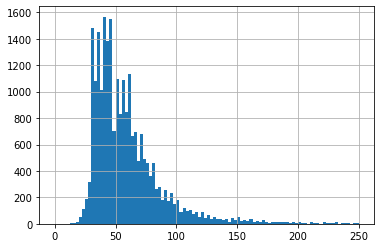

In [51]:
# построим гистограмму общей площади квартиры
df.total_area.hist(bins=100, range=(0, 250))

Больше всего квартир составляет с площадью от 32 до 47 кв.м..

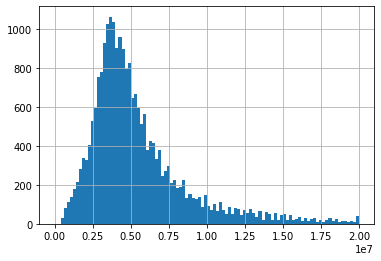

In [52]:
# построим гистограмму стоимости квартиры
df.last_price.hist(bins=100, range=(0, 2*10**7))

Значительная часть квартир продается за 3-5 млн.

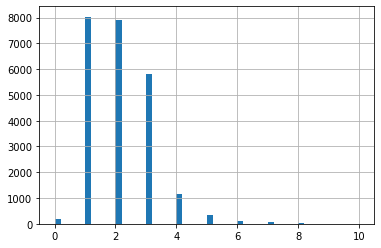

In [53]:
# построим гистограмму количества комнат квартиры
df.rooms.hist(bins=50, range=(0, 10))

Чаще всего покупают квартиру с 1-2 комнатами. В 8 раз меньше покупают с 4 комнатами.

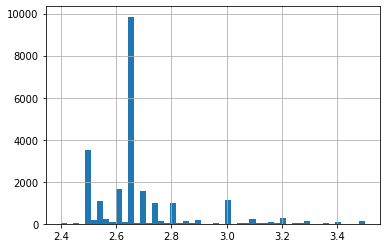

In [54]:
# построим гистограмму высоты потолка квартиры
df.ceiling_height.hist(bins=50, range=(2.4, 3.5))

Чаще всего у продаваемых квартир высота потолка составляет 2,7 метров.

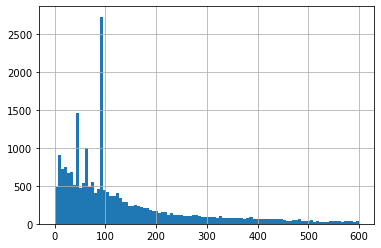

In [55]:
# построим гистограмму количества дней размещения объявления
df.days_exposition.hist(bins=100, range=(0, 600))

Среди значений времени продажи квартиры сильно выделяется число 95. Больая часть квартиры продаются до 200 дней.

Изучим, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

Уберем редкие и выбивающиеся значения. 

In [56]:
# выведем основные статистические данные для столбца количества дней размещения объявления
df['days_exposition'].describe()

count    23650.000000
mean       169.985455
std        207.010975
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

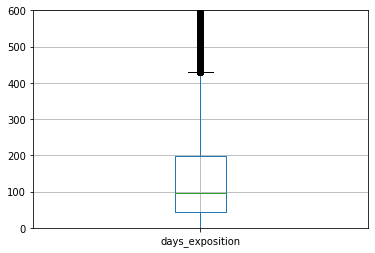

In [57]:
# построим график - ящик с усами для количества дней размещения объявления
df.boxplot(column='days_exposition') 
plt.ylim(0,600)
plt.show()

In [58]:
# Убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3
df_after_emissions = df.query('days_exposition < 432') 

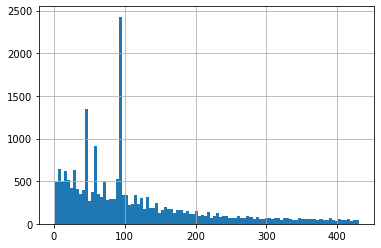

In [59]:
# построим гистограмму количества дней размещения объявления
df_after_emissions['days_exposition'].hist(bins= 100)

По графикам было выявлено, что самое продолжительное время, за которое продают квартиры это 432 дня. Медианным значением или границей быстро проданной квартиры является 95 дней.

По результату отбросили все строчки, по которому выполнялось условие: количествао дней размещения объявления меньше 432 дней.

In [60]:
# выведем основные статистические данные стоимости квартиры
df_after_emissions['last_price'].describe()

count    2.134000e+04
mean     6.376849e+06
std      1.077006e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

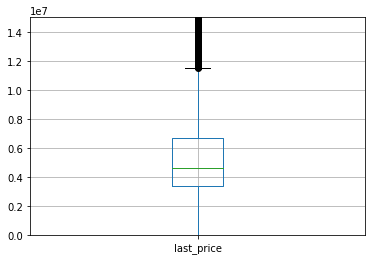

In [61]:
# построим график - ящик с усами для стоимости квартиры
df_after_emissions.boxplot(column='last_price')
plt.ylim(0,15000000)
plt.show()

In [62]:
# Убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3
df_after_emissions = df_after_emissions.query('1*10**6 < last_price < 11.8*10**6')

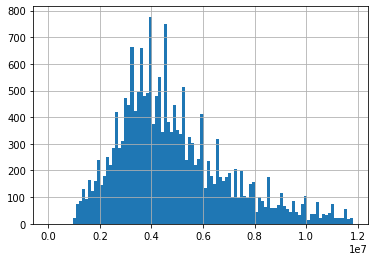

In [63]:
# построим гистограмму стоимости квартиры
df_after_emissions['last_price'].hist(bins=100, range=(0, 11.8*10**6))

По графикам было выявлено, что выбросы начинались после отметки суммы 11,8 млн.. Медианным значением стоимости квартиры явлется 4,6 млн.

По результату отбросили все строчки, по которому выполнялось условие: стоимость квартиры больше 1 млн. и меньше 11,8 млн..

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

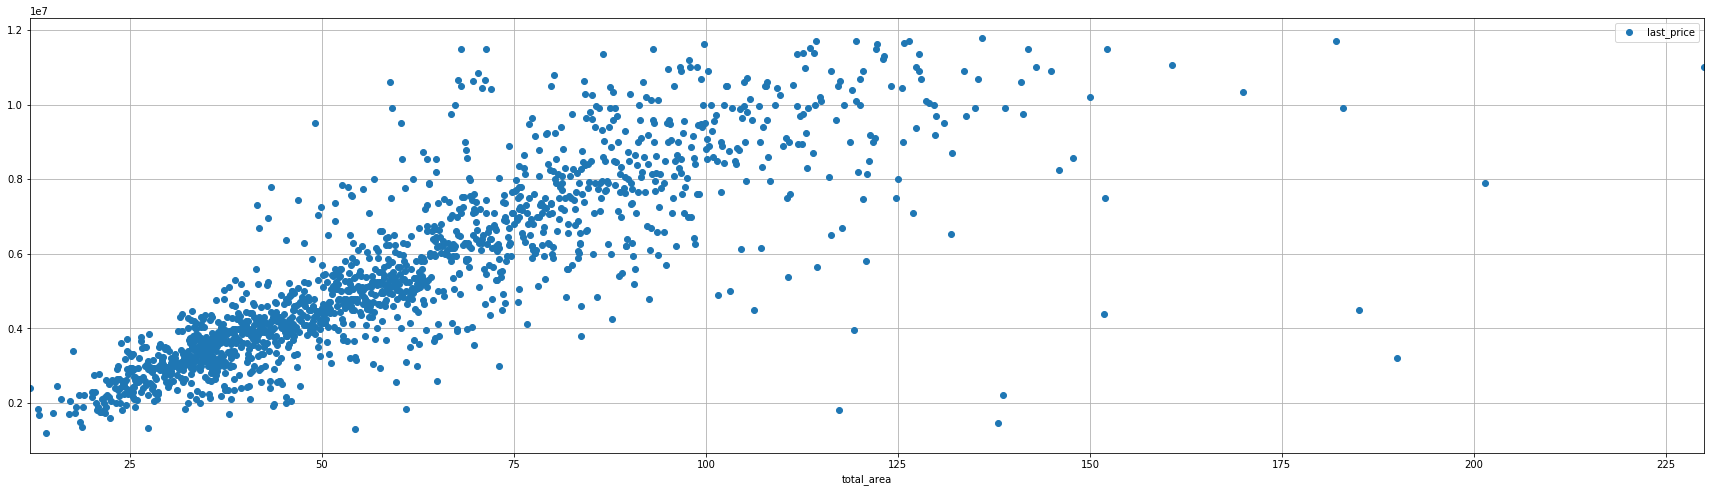

In [64]:
# построим график зависимости цены квартиры от её площади
(df_after_emissions
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(30, 8))
)

In [65]:
# посчитаем корреляцию цены квартиры и общей площади
#df_after_emissions['last_price'].corr(df_after_emissions['total_area'])

При увеличении площади, увеличивается стоимость квартиры. Коррелция положительная и большая. Это значит, что эти два параметра зависяет друг от друга.

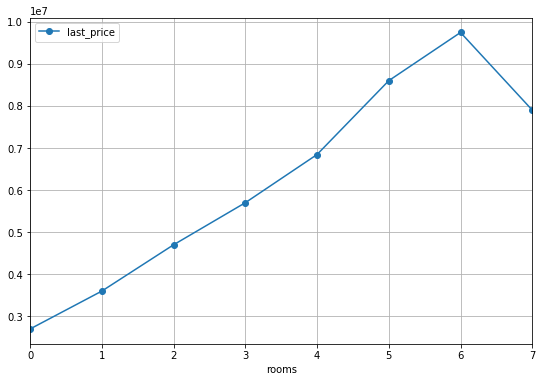

In [66]:
# построим график зависимости цены квартиры от количества комнат
(df_after_emissions
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

In [67]:
# посчитаем корреляцию цены квартиры и количества комнат
df_after_emissions['last_price'].corr(df_after_emissions['rooms'])

0.45172644573166937

При увеличении комнат цена квартиры растет. Корреляция положительная, зависимость есть. На графике для 7 комнат провал, так как данных не так много для 7-ми комнатных квартир. 

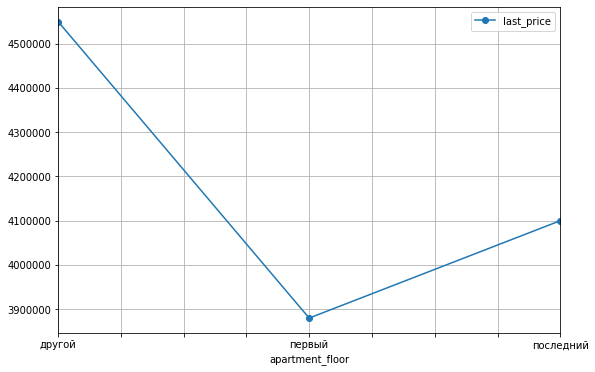

In [68]:
# построим график зависимости цены квартиры от этажа
(df_after_emissions
    .pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

In [69]:
# посчитаем корреляцию цены квартиры и этажа
df_after_emissions['floor'].corr(df_after_emissions['last_price'])

0.12517101137265624

Зависимость цены от этажа есть, но очень слабая. Цена квартир на первом этаже чуть ниже чем на других. 

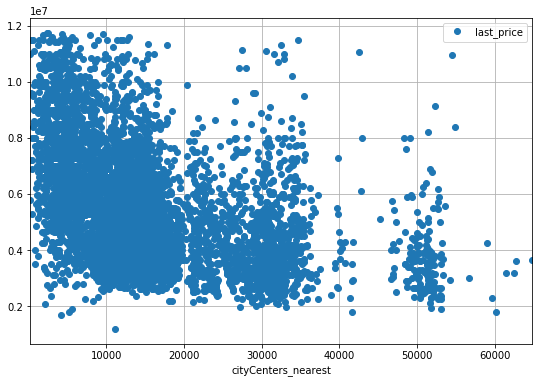

In [70]:
# построим график зависимости цены квартиры от удаленности квартиры от центра города
(df_after_emissions
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(9, 6))
)

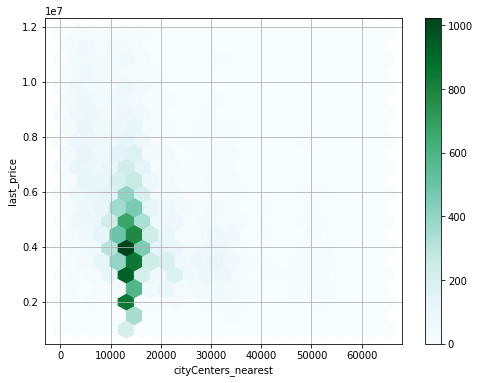

In [71]:
# построим график зависимости цены квартиры от удаленности квартиры от центра города
(df_after_emissions.plot(x='cityCenters_nearest', y='last_price'
                         , kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
)

In [72]:
# посчитаем корреляцию цены квартиры и удаленности квартиры от центра города
df_after_emissions['cityCenters_nearest'].corr(df_after_emissions['last_price'])

-0.24616037555260067

Корреляция отрицательная, но и не сильная и не слабая. Можно сказать, что зависимость есть. Самая большая плотность продаж на на 12 км от центра города при цене квартиры в 3-4 млн..

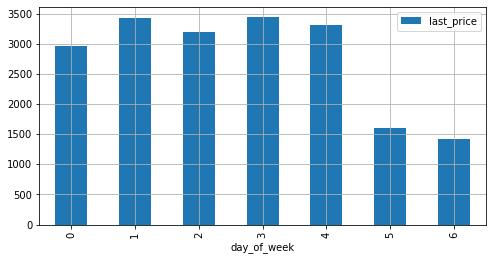

In [73]:
# построим график зависимости количества размещения объявлений о продаже квартиры от дня недели размещения объявления
(df_after_emissions
    .pivot_table(index='day_of_week', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(8, 4), kind='bar')
)

In [74]:
# посчитаем корреляцию цены квартиры и дня недели размещения объявления
df_after_emissions['day_of_week'].corr(df_after_emissions['last_price'])

-0.009524961752298576

Чаще всего объявления о продаже выставляются в будние дни. В выходные люди предпочитают отдохнуть. Зависимости между ценой и днем недели размещения объявления нет.

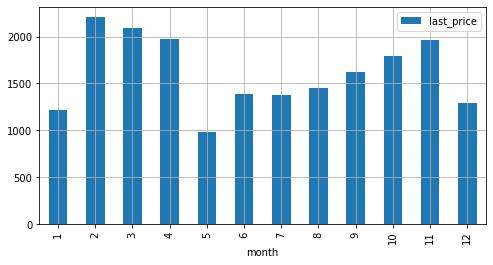

In [75]:
# построим график зависимости количества размещения объявлений о продаже квартиры от месяца размещения объявления
(df_after_emissions
    .pivot_table(index='month', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(8, 4), kind='bar')
)

In [76]:
# посчитаем корреляцию цены квартиры и месяца размещения объявления
df_after_emissions['month'].corr(df_after_emissions['last_price'])

0.0005807368780462038

Чаще всего объявления о продаже выставляются в феврале-марте-апреле и в ноябре. Обычно спрос на квартиры весной и перед новым годом маленький. Зависимости между ценой и месяцем размещения объявления нет.

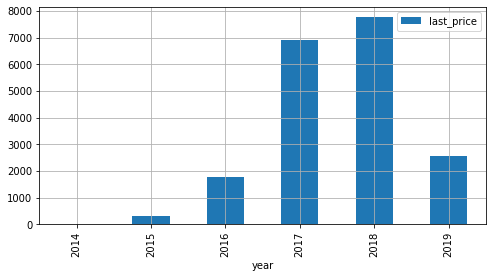

In [77]:
# построим график зависимости количества размещения объявлений о продаже квартиры от года размещения объявления
(df_after_emissions
    .pivot_table(index='year', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(8, 4), kind='bar')
)

In [78]:
# посчитаем корреляцию цены квартиры и года размещения объявления
df_after_emissions['year'].corr(df_after_emissions['last_price'])

0.03583423489759566

Чаще всего объявления продаж были в 2017 и 2018 году. Зависимости между ценой и годом размещения объявления нет.

Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [79]:
# отсортируем 10 населенных пунктов с наибольшим числом объявлений
(df_after_emissions.pivot_table(index='locality_name', values='price_per_m2', aggfunc=('count','median'))
 .sort_values(by='count', ascending=False).head(10)
)

,count,median
locality_name,,
Санкт-Петербург,12447,101978.691020
Мурино,545,86272.475795
Кудрово,428,96136.887804
Шушары,407,76923.076923
Всеволожск,354,65789.473684
Колпино,314,74349.662162
Пушкин,308,98454.743209
Парголово,305,91346.153846
Гатчина,274,67671.510409


В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 кв.м.

В Выборге меньше всего объявлений и самая низкая стоимость 1 кв.м.

Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [80]:
# создаем столбец с расстоянием до центра города в километрах
df_after_emissions['cityCenters_nearest_km'] = df_after_emissions['cityCenters_nearest']/1000

In [81]:
# посчитаем среднюю цену для каждого километра
df_after_emissions['price_per_km'] = df_after_emissions['last_price']/df_after_emissions['cityCenters_nearest_km']

In [82]:
# делаем срез по городу с наибольшим количеством объявлений
apartments_in_spb = df_after_emissions.query('locality_name == "Санкт-Петербург"')

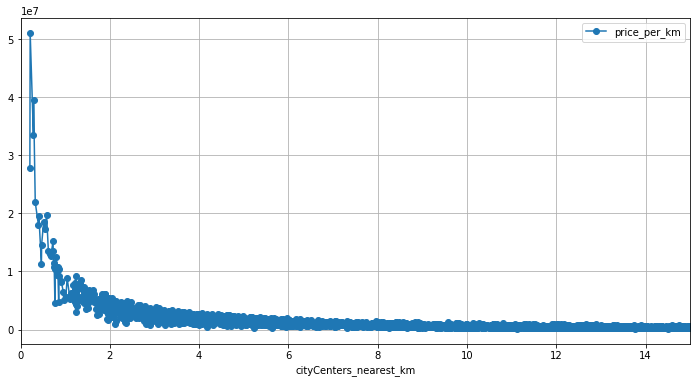

In [83]:
# построим график зависимости цены одного километра от удаленности квартиры от центра города
(apartments_in_spb
    .pivot_table(index='cityCenters_nearest_km', values='price_per_km', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(12, 6), xlim=(0, 15))
)

Примерно на 6 км график перестает сильно меняться. Примем границу центра в 6 км. 

По результату отбросим все строчки, по которому выполняется условие: расстояние до центра города меньше 6 км.

In [84]:
# делаем срез по удаленности квартиры от центра города
apartments_in_spb = apartments_in_spb.query('cityCenters_nearest_km < 6')

Выделим сегмент квартир в центре. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы, отличаются ли они от общих выводов по всему городу.

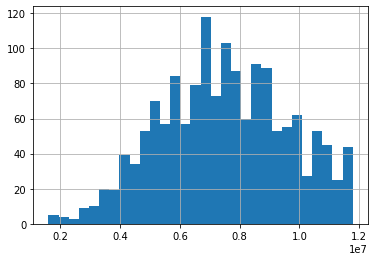

In [85]:
# построим гистограмму цены квартиры
apartments_in_spb['last_price'].hist(bins=30)

Чаще всего в центре города квартиры продаются за 7 млн..

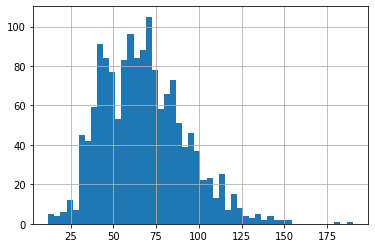

In [86]:
# построим гистограмму общей площади квартиры
apartments_in_spb['total_area'].hist(bins=50)

Чаще всего в центре города квартиры продаются с площадью 55-75 кв.м..

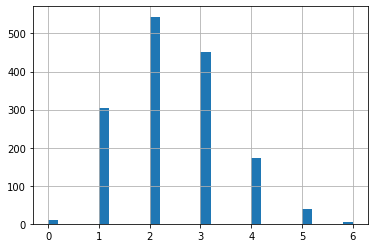

In [87]:
# построим гистограмму количества комнат 
apartments_in_spb['rooms'].hist(bins=30)

Чаще всего в центре города продаются квартиры с 2 комнатами.

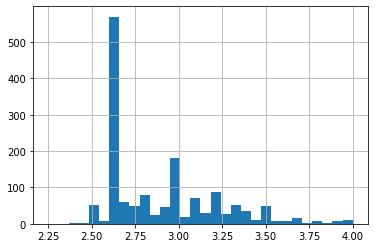

In [88]:
# построим гистограмму высоты потолков
apartments_in_spb['ceiling_height'].hist(bins=30, range=(2.25, 4))

Чаще всего в центре города продаются квартиры с высотой потолка 2,6 м.

In [89]:
# заменим название столбца, для того, чтобы было удобно различать графики
apartments_in_spb.rename(columns={'last_price': 'last_price_in_spb'}, inplace=True)

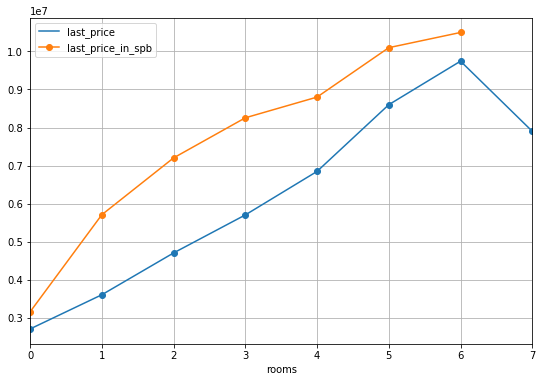

In [90]:
# построим график зависимости цены квартиры от количества комнат
# по всему городу
ax = (df_after_emissions
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='rooms', values='last_price_in_spb', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6), ax=ax)
)

plt.show()

С увеличением комнат увеличивается стоимость. График квартир в центре сдвинут вверх отностительно всех квартир, так ка в центре квартиры дороже. Самые дорогие 6 комнатные квартиры.

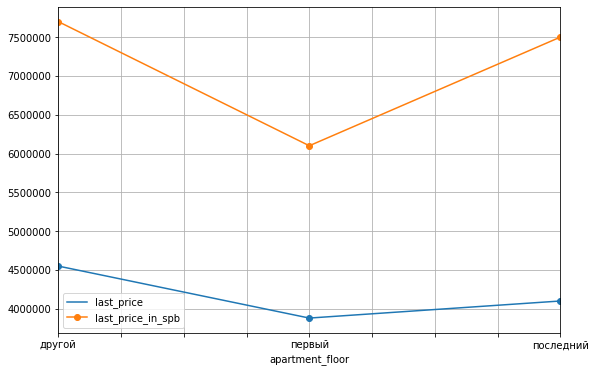

In [91]:
# построим график зависимости цены квартиры от этажа
# по всему городу
ax = (df_after_emissions
    .pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='apartment_floor', values='last_price_in_spb', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(9, 6), ax=ax)
)

plt.show()

В центральном районе цена квартиры на первом этаже сильно меньше по сравнению с последним этажом, чем цена квартиры на пераом и последнем этаже по всему городу. Также цены выше в центре города. 

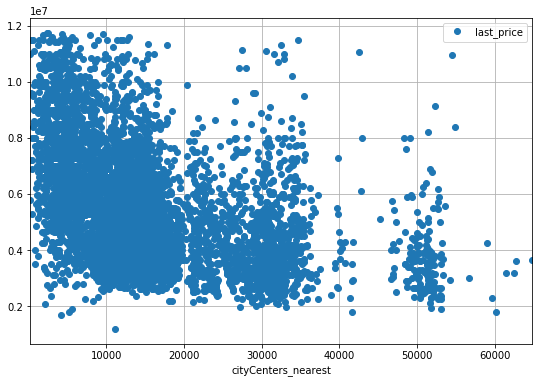

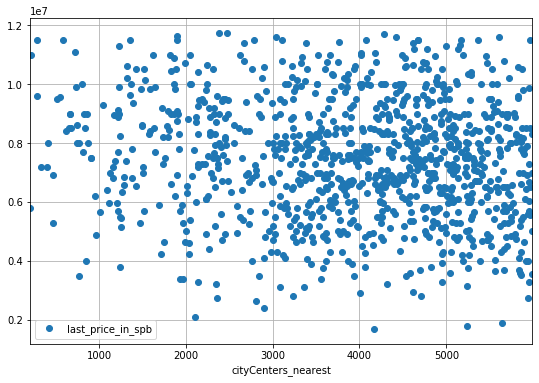

In [92]:
# построим график зависимости цены квартиры от удаленности квартиры от центра города
# по всему городу
(df_after_emissions
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='cityCenters_nearest', values='last_price_in_spb', aggfunc='median')
    .plot(grid=True, style='o', figsize=(9, 6))
)
plt.show()

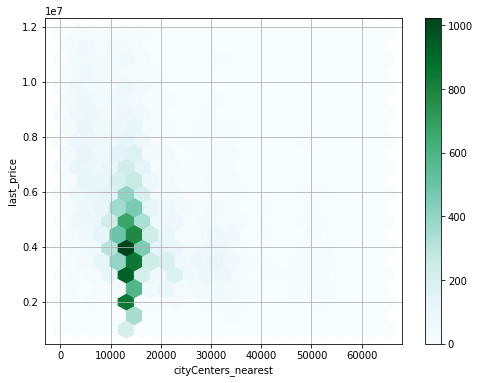

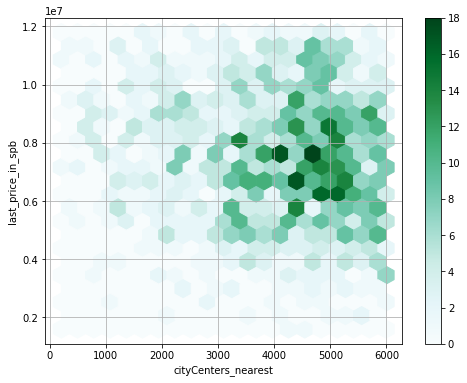

In [93]:
# построим график зависимости цены квартиры от удаленности квартиры от центра города
# по всему городу
(df_after_emissions.plot(x='cityCenters_nearest', y='last_price', kind='hexbin'
                         , gridsize=20, figsize=(8, 6), sharex=False, grid=True)
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb.plot(x='cityCenters_nearest', y='last_price_in_spb', kind='hexbin'
                        , gridsize=20, figsize=(8, 6), sharex=False, grid=True)
)

Цена большей части квартир по всему городу составляет 3-4 млн. на 12 км. 

Цена большей части квартир в центре города составляет 6-8 млн. на 4-5 км.

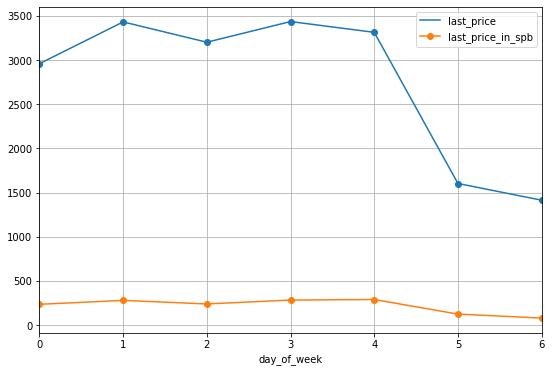

In [94]:
# построим график зависимости цены квартиры от дня недели размещения объявления
# по всему городу
ax = (df_after_emissions
    .pivot_table(index='day_of_week', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='day_of_week', values='last_price_in_spb', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6), ax=ax)
)

plt.show()

Графики дня недели размещения объявления как по всему городу, так и в центре Санкт-Петербурга примерно одинаковые.  

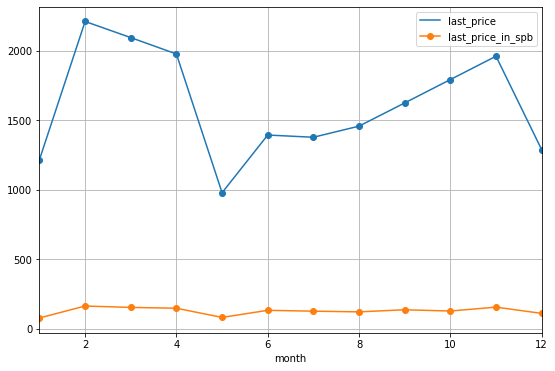

In [95]:
# построим график зависимости цены квартиры от месяца размещения объявления
# по всему городу
ax = (df_after_emissions
    .pivot_table(index='month', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='month', values='last_price_in_spb', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6), ax=ax)
)

plt.show()

Графики месяца размещения объявления как по всему городу, так и в центре Санкт-Петербурга примерно одинаковые.  

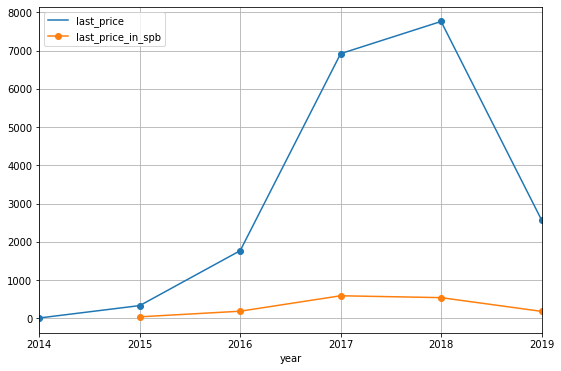

In [96]:
# построим график зависимости цены квартиры от года размещения объявления
# по всему городу
ax = (df_after_emissions
    .pivot_table(index='year', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6))
)

# и по Санкт-Петербургу, где больше всего продаж квартир
(apartments_in_spb
    .pivot_table(index='year', values='last_price_in_spb', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(9, 6), ax=ax)
)

plt.show()

Графики года размещения объявления как по всему городу, так и в центре Санкт-Петербурга примерно одинаковые.  

### Вывод

По всему городу и Санкт-Петербургу корреляция цены и других парамтеров похожая. Отличие только в цене и площади. В центре города цена и площадь квартиры больше.

Цена на квартиру зависит от площади, этажа, количества комнат и удаленности от центра города. 

## Общий вывод

Общая картина часто продаваемых квартир по всему городу следующее: 

* площадь: 32-47 кв.м.,
* цена: 3-5 млн.,
* комнат: 1-2,
* высота потолков: 2,7 м.

Общая картина часто продаваемых квартир по Санкт-Петербургу: 
* площадь: 55-75 кв.м.,
* цена: 7 млн.,
* комнат: 2,
* высота потолков: 2,6 м.

Исследование показало, что корреляция цены большая с параметрами  площади, количества комнат, этажа и удаленности от центра города. С другими параметрами зависимость слабая.